<a href="https://colab.research.google.com/github/ImmortalizedInHearts/AutoEncoder/blob/main/autoEncoderWithFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import sklearn

from tqdm import tqdm
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam, RMSprop

In [90]:
def getImages(data, pred):
  plt.figure(figsize=(20,5))
  test_y = pred
  N = 10
  for i in range(1,N+1):
      plt.subplot(2,N,i)
      plt.imshow(np.reshape(data[:,i], (16,16)), cmap="plasma")
      plt.axis("off")
      plt.grid(b=False)

      plt.subplot(2,N,i+N)
      plt.imshow(np.reshape(test_y[:,i],(16,16)), cmap="plasma")
      plt.axis("off")
      plt.grid(b=False)
  plt.show()

In [68]:
mat = scipy.io.loadmat('data.mat')
xTrain = np.array(mat['data']['test'][0][0][0][0][0])
yTrain = np.array(mat['data']['test'][0][0][0][0][1])

xTest = np.array(mat['data']['training'][0][0][0][0][0])
yTest = np.array(mat['data']['training'][0][0][0][0][1])

xValidation = np.array(mat['data']['validation'][0][0][0][0][1])
yValidation = np.array(mat['data']['validation'][0][0][0][0][0])

In [152]:
input = Input(shape=(256,))
enc = Dense(10, activation='sigmoid')(input)

input_d = Input(shape=(10,))
dec = Dense(256, activation='softmax')(input_d)

encoder = Model(input, enc)
decoder = Model(input_d, dec)
model = Model(input, decoder(encoder(input)))
model.compile(
    optimizer=Adam(lr=0.02),
    loss='MSE',
    metrics='accuracy'
)
model.summary()

Model: "functional_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 256)]             0         
_________________________________________________________________
functional_126 (Functional)  (None, 10)                2570      
_________________________________________________________________
functional_128 (Functional)  (None, 256)               2816      
Total params: 5,386
Trainable params: 5,386
Non-trainable params: 0
_________________________________________________________________


In [153]:
myModel = model.fit(
    xTrain.T, xTrain.T, 
    batch_size=100,
    epochs=200
    )

Epoch 1/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.0143
Epoch 2/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.0108
Epoch 3/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.0290
Epoch 4/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.0304
Epoch 5/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.0330
Epoch 6/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.0523
Epoch 7/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.0597
Epoch 8/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.0636
Epoch 9/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.0620
Epoch 10/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.0689
Epoch 11/

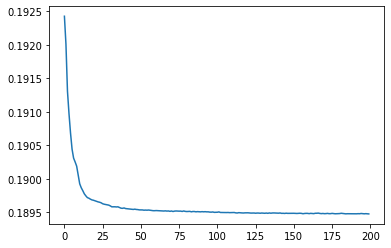

10/10 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.0600


In [154]:

plt.plot(myModel.history['loss'])
plt.show()
res = model.evaluate(xTest.T, xTest.T, batch_size = 100)

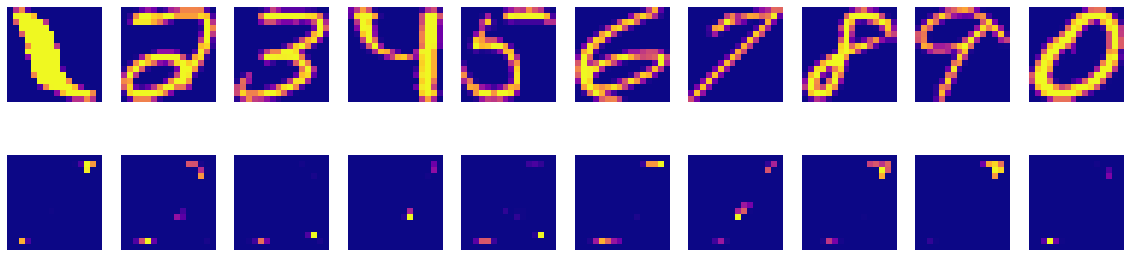

In [155]:
getImages(xTrain, model.predict(xTest.T).T)